In [1]:

"""
Initialization
"""
# imports
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from collections import defaultdict
from graphviz import Digraph
import numpy as np
import re
import seaborn as sns
import sys
from matplotlib.colors import LinearSegmentedColormap
import importlib, util
PROJECT_PATH = "/Users/antata/Library/CloudStorage/OneDrive-BaylorCollegeofMedicine/text-mining/categories"
TABLE_PATH = "/Users/antata/Library/CloudStorage/OneDrive-BaylorCollegeofMedicine/text-mining/manuscript/stables"
os.chdir(PROJECT_PATH)
importlib.reload(util)
from util import CATEGORY_NAMES, CATEGORIES, COLOR_TEMPLATE, CORSIV_PROBE_LIST, CONTROLS, read_in_probes, calculate_points, plot_enrichment, breakdown, export_paper


epic = pd.read_csv("../humanData/database/EPIC.hg38.txt", sep="\t", header=None)
epic_probe_list = set(epic.iloc[:,3])
hm450 = pd.read_csv("../humanData/database/HM450.hg38.txt", sep="\t", header=None)
hm450_probe_list = set(hm450.iloc[:,3])
illumina = epic_probe_list.union(hm450_probe_list)

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 2  # Thicker outer box
plt.rcParams['xtick.major.width'] = 2  # Thicker x-axis ticks
plt.rcParams['ytick.major.width'] = 2  # Thicker y-axis ticks





In [10]:
# Create columns to store corresponding IDs from CoRSIV_ID2
corsiv_annotated = pd.read_excel(f"{TABLE_PATH}/annotated_corsiv_all.xlsx").iloc[:, :9]
corsiv_bed = pd.read_csv(f"/Users/antata/Desktop/probe_overlap/cleaned_data/regions/corsiv_regions_autosome_padded.bed", sep="\t", names=["chr", "start", "end", "CoRSIV_ID", "original_id"])[["CoRSIV_ID", "original_id"]]
corsiv_annotated = pd.merge(corsiv_annotated, corsiv_bed, on="CoRSIV_ID", how="left")
corsiv_annotated['ME_ID'] = corsiv_annotated['original_id'].apply(lambda x: ','.join([id for id in x.split(',') if id.split('_')[0] == 'ME']))
corsiv_annotated['SIV_ID'] = corsiv_annotated['original_id'].apply(lambda x: ','.join([id for id in x.split(',') if id.split('_')[0] == 'SIV']))
corsiv_annotated['ESS_ID'] = corsiv_annotated['original_id'].apply(lambda x: ','.join([id for id in x.split(',') if id.split('_')[0] == 'ESS']))
corsiv_annotated['CoRSIV2019_ID'] = corsiv_annotated['original_id'].apply(lambda x: ','.join([id for id in x.split(',') if id.split('_')[0].isnumeric()]))
corsiv_annotated.drop(columns=["original_id"], inplace=True)
corsiv_annotated.to_csv(f"{TABLE_PATH}/annotated_corsiv_all.csv", index=False)

In [18]:
corsiv_probes = pd.read_excel(f"{TABLE_PATH}/../up to date drafts/supplementary_tables.xlsx", sheet_name="S2")
corsiv_probes[corsiv_probes["HM450"]][["Chromosome", "Probe Start", "Probe End", "Probe ID"]].to_csv("/Users/antata/Desktop/hm450_corsiv_probes.bed", index=False, header=0, sep="\t")


In [19]:
control_probes = pd.read_excel(f"{TABLE_PATH}/../up to date drafts/supplementary_tables.xlsx", sheet_name="S4")
hm450_control_probes = control_probes[control_probes["Probe ID"].isin(hm450_probe_list)]
hm450_control_probes["control_groups"] = hm450_control_probes["Control_ID"].apply(lambda x: x.split("_")[-1])
# hm450_control_probes["control_groups"].value_counts()
hm450_control_probes[hm450_control_probes["control_groups"] == "8"][["Chromosome", "Probe Start", "Probe End", "Probe ID"]].to_csv("/Users/antata/Desktop/hm450_control_probes.bed", index=False, header=0, sep="\t")


/var/folders/9p/4j0cmzvj4wbdfnfx78_t44ww0000gp/T/ipykernel_80762/2918429680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm450_control_probes["control_groups"] = hm450_control_probes["Control_ID"].apply(lambda x: x.split("_")[-1])


In [27]:
df = pd.read_csv("/Users/antata/Desktop/hm450_corsiv_probes.bed", sep="\t", names=["chr", "start", "end", "id"])
df[df["id"].isin(CORSIV_PROBE_LIST) & (df["id"].isin(hm450_probe_list))]


,chr,start,end,id
0,chr1,852017,852019,cg09139287
1,chr1,852042,852044,cg05662829
2,chr1,1067745,1067747,cg10955566
3,chr1,1067995,1067997,cg08709360
4,chr1,1068036,1068038,cg01244934
...,...,...,...,...
2631,chr22,50546687,50546689,cg22910549
2632,chr22,50547251,50547253,cg04177826
2633,chr22,50547367,50547369,cg22249529
2634,chr22,50547601,50547603,cg07600533


In [11]:
control_probes = pd.read_excel(f"{TABLE_PATH}/../up to date drafts/supplementary_tables.xlsx", sheet_name="S4")
control_probes["EPIC"] = control_probes["Probe ID"].isin(epic_probe_list)
control_probes["HM450"] = control_probes["Probe ID"].isin(hm450_probe_list)
control_probes
# control_probes.to_csv(f"{TABLE_PATH}/control_probes_by_platform.csv", index=False)

,Probe ID,Chromosome,Probe Start,Probe End,Control Start,Control End,Control_ID,EPIC,HM450
0,cg26114254,chr1,985199,985201,985100,985400,1_4027500_4027800_1,True,True
1,cg20996124,chr1,1208822,1208824,1208700,1210400,1_143652900_143654600_1,True,True
2,cg16266669,chr1,1209177,1209179,1208700,1210400,1_143652900_143654600_1,True,True
3,cg02296931,chr1,1209277,1209279,1208700,1210400,1_143652900_143654600_1,True,True
4,cg15924570,chr1,1209343,1209345,1208700,1210400,1_143652900_143654600_1,True,True
...,...,...,...,...,...,...,...,...,...
35165,cg00588575,chr9,137065718,137065720,137064500,137066800,9_63814700_63817000_10,True,False
35166,cg07182691,chr9,137065815,137065817,137064500,137066800,9_63814700_63817000_10,True,False
35167,cg05824261,chr9,137306335,137306337,137305500,137306400,9_133759200_133760100_10,True,False
35168,cg14452299,chr9,137876462,137876464,137876400,137876900,9_133419000_133419500_10,True,True


In [20]:
df = pd.read_csv("pubmed_search/all_studies_cleaned.csv")
df = df[["PMID", "PMCID", "Category", "Year", "Journal", "Title"]]
# Split categories and create boolean columns for each category
df["Category"] = df["Category"].apply(lambda x: [y.strip() for y in x.split(";")])

for category in CATEGORY_NAMES:
    df[category.capitalize()] = df['Category'].apply(lambda x: category.capitalize() in x)

df.drop(columns=["Category"], inplace=True)
df.to_csv(f"{TABLE_PATH}/all_2203_studies.csv", index=False)



In [25]:
df = pd.read_csv("probe/all_probes.csv")
df["Category"] = df["Category"].apply(lambda x: [y.strip() for y in x.split(";")])

for category in CATEGORY_NAMES:
    df[category.capitalize()] = df['Category'].apply(lambda x: category.capitalize() in x)

df.drop(columns=["Category"], inplace=True)
df.rename(columns={"pmcid": "PMCID", "probeId": "Probe ID"}, inplace=True)
df.to_csv(f"{TABLE_PATH}/all_probes.csv", index=False)



In [33]:
df = pd.read_csv("../control/control_all_probes_id.txt", sep="\t", names=["chr", "start", "end", "probeId", "Control_ID"])
regions = pd.read_csv("../control/corsiv_control_matching.csv").iloc[:, [0, 1, 2, 3]]
df = df.merge(regions, on="Control_ID", how="left")
df = df[["probeId", "chr", "start", "end", "control_start", "control_end", "Control_ID"]]
df.columns = ["Probe ID", "Chromosome", "Probe Start", "Probe End", "Control Start", "Control End", "Control_ID"]
df.to_csv(f"{TABLE_PATH}/all_control_probes.csv", index=False)

In [ ]:
current_category = "cancer"
target_idx = CATEGORY_NAMES.index(current_category)
mesh_ttoc = defaultdict(set) #term:code
file_path = '../humanData/database/mtrees2024.txt'
# Read the lines from the file
with open(file_path, 'r') as file:
    for line in file:
        # Split each line into A and B
        parts = line.strip().split(';')
        if len(parts) == 2:
            term, code = parts
            mesh_ttoc[term].add(code)
        else:
            print(parts)
mesh_ctot =  {v:k for k, vs in mesh_ttoc.items() for v in vs}

def starts_with_any(given_string, string_list):
    for prefix in string_list:
        if given_string.startswith(prefix):
            return True
    return False
neuro_mesh_tree = {}
keywords = CATEGORIES[target_idx]
for kw in keywords:
    neuro_mesh_tree[kw] = set([k for k, v in mesh_ttoc.items() for c in v if starts_with_any(c, mesh_ttoc[kw])])
def filter_mesh_list(input):
    return any(input in sublist for sublist in neuro_mesh_tree.values())
if current_category != "metabolic":
    neuro_df = pd.read_csv(f"probe/{current_category}_all_probes.csv")  
    neuro_df["Filtered Mesh Term"] = neuro_df["Filtered Mesh Term"].apply(lambda x: [term.strip() for term in x.split("|")])
else:
    neuro_df = pd.read_csv(f"probe/metabolic_diseases_all_probes.csv")  
    neuro_df["Filtered Mesh Term"] = neuro_df["Filtered Mesh Term"].apply(eval)

temp1 = neuro_df.drop_duplicates(subset="pmcid")
mesh_count_by_study = defaultdict(int)
mesh_terms = list(temp1["Filtered Mesh Term"])
pmcids = list(temp1["pmcid"])
term_pmcid_map = defaultdict(set)
for i in range(len(mesh_terms)):
    m = mesh_terms[i]
    for t in m:
        mesh_count_by_study[t] += 1
        term_pmcid_map[t].add(pmcids[i])
mesh_count_by_study = {key:count for key, count in mesh_count_by_study.items() if filter_mesh_list(key)}
mesh_count_by_study[current_category.capitalize()] = len(set(neuro_df["pmcid"]))
mesh_count_by_study = dict(sorted(mesh_count_by_study.items(), reverse=True))
categories = list(mesh_count_by_study.keys())
counts = list(mesh_count_by_study.values())

enriched_categories = []
not_enriched_categories = []

d1 = []
d2 = []
probes = []
papers_ct = []
terms, counts = zip(*[(k, v) for k, v in mesh_count_by_study.items()])
for term in terms:
    p, paper, r, p2 = breakdown(neuro_df, term_pmcid_map, [term], target_idx, show_figure=False)
    probes.append(p)
    d1.append(paper)
    d2.append(r)
    papers_ct.append(p2)
    # break

df = pd.DataFrame({"Categories":terms, "Enrichment Ratio":d2, "CoRSIV Probes": probes, "CoRSIV Papers":papers_ct, "Highest Number of Papers": d1, "Total Number of Papers": counts})
df.sort_values("Enrichment Ratio", ascending=False, inplace=True)
df.index = df["Categories"]
df.drop(columns=["Categories"], inplace=True)
df = df[(df["Enrichment Ratio"] > 1) & (df["Highest Number of Papers"]> 1) & (df.index!=current_category.capitalize())][["Enrichment Ratio", "CoRSIV Probes", "CoRSIV Papers"]]
# df[(df["Enrichment Ratio"] > 1) & (df["Highest Number of Papers"]> 1) & (df.index!=current_category.capitalize())]
df

In [47]:
importlib.reload(util)
from util import CATEGORY_NAMES, CATEGORIES, COLOR_TEMPLATE, CORSIV_PROBE_LIST, CONTROLS, read_in_probes, calculate_points, plot_enrichment, breakdown, export_paper


In [ ]:
dfs = []
for t in ["corsiv", "noncorsiv"]:
    df1 = pd.read_csv(f"{PROJECT_PATH}/iir_icc/GSE61151_{t}_icc_results.csv", index_col=0)
    df2 = pd.read_csv(f"{PROJECT_PATH}/iir_icc/GSE61151_{t}_iir_results.csv", index_col=0)
    m = pd.merge(df1, df2, on="ID", how="left")[["ID", "ICC", "iir1"]]
    m.columns = ["Probe ID", f"ICC", f"IIR2-98"]
    m["ICC"] = m["ICC"].round(2)
    m[f"IIR2-98"] = m[f"IIR2-98"].round(2)
    print(m["ICC"].median(), m[f"IIR2-98"].median())
    dfs.append(m)
df = pd.concat(dfs)
df.drop_duplicates(inplace=True)
df["CoRSIV Probe"] = df["Probe ID"].apply(lambda x: x in CORSIV_PROBE_LIST)
df.to_csv(f"{TABLE_PATH}/flanagan_data.csv", index=False)

In [87]:
df = pd.read_csv(f"{PROJECT_PATH}/becon/becon_all_probes.csv")
df.drop_duplicates(inplace=True)
df = df.iloc[:, [0, 5, 6, 7, 8]]
df = df.round(2)
df["CoRSIV Probe"] = df["CpG ID"].apply(lambda x: x in CORSIV_PROBE_LIST)
df = df.sort_values("Mean Cor All Brain", ascending=False)
df.to_csv(f"{TABLE_PATH}/becon_data.csv", index=False)

In [ ]:
# go on probes
paper_threshold = 2
df = pd.read_csv(f"heatmap/probe_based_heatmap_{paper_threshold}papers.csv", index_col=0)
for cat in CATEGORY_NAMES:
    target_category = cat
    unique_probes = set(df[(df[target_category] != 0) & (df.drop(columns=[target_category]) == 0).all(axis=1)].index)
    g, l = get_gene_illumina(unique_probes) 
    print(f"{len(g):,} Genes Annotated to {len(unique_probes):,} Probes Reported in ≥ {paper_threshold} {target_category.capitalize()} Papers")
  
    # run_enrichr(g, output_fp=f"go_probe/go_results/{target_category}_all_{paper_threshold}papers_unique_gencode.csv")


In [38]:
import math

manual = pd.read_csv("pubmed_search/archive/adhd_test/probes/all_ADHD_probes.csv")
manual = manual[manual["probeId"].str.startswith("cg") | manual["probeId"].str.startswith("ch.")]
manual = manual[manual["probeId"].isin(epic_probe_list) | manual["probeId"].isin(hm450_probe_list)]
manual["p-value_float"] = manual["p-value"].str.replace("−", "-").str.replace("‐", "-").str.replace("–", "-").str.replace(" × E", "e").apply(to_float)
manual["q-value_float"] = manual["q-value"].str.replace("−", "-").str.replace("‐", "-").str.replace("–", "-").str.replace(" × E", "e").apply(to_float)
manual["adj-p-value_float"] = manual["adj-p-value"].str.replace("−", "-").str.replace("‐", "-").str.replace("–", "-").str.replace(" × E", "e").apply(to_float)
manual = manual.groupby(['pmcid', 'From']).filter(lambda x: len(x) <= 1000)


keep = pd.read_csv("pubmed_search/archive/adhd_test/probes/all_ADHD_source.csv")
manual = pd.merge(manual, keep, on=["pmcid", "Notes", "From", "Title"])
manual = manual[manual["Keep1"]==1]
manual = manual[(manual["p-value_float"] < 0.05)]

# manual = manual[(manual["q-value"] < 0.05) | (manual["adj-p-value"] < 0.05) | (manual["p-value"] < 1e-5)]
# manual = manual.drop_duplicates(subset=["pmcid", "probeId"])
manual.iloc[:, 0:8].to_csv(f"{TABLE_PATH}/adhd_manual_probes.csv", index=False)

In [ ]:
import pandas as pd

def estimate_r_squared(beta, se, n):
    Fval = (beta / se) ** 2
    R2 = Fval / (n - 2 + Fval)
    return R2

epic_mqtl_df = pd.read_csv("/Users/antata/Downloads/top_meQTL.txt", sep="\t")
epic_mqtl_df = epic_mqtl_df[epic_mqtl_df["Cis/Trans"]=="cis"]
epic_mqtl_df['estimated_r2'] = epic_mqtl_df.apply(lambda x: estimate_r_squared(x['Beta'], x['SE'], x['n']), axis=1)
epic_mqtl_df
plt.figure(figsize=(8,4))
epic_mqtl_df[~epic_mqtl_df["CpG"].isin(CORSIV_PROBE_LIST)]['estimated_r2'].plot(kind='kde', linestyle='--', label="Non-CoRSIV")
epic_mqtl_df[epic_mqtl_df["CpG"].isin(CORSIV_PROBE_LIST)]['estimated_r2'].plot(kind='kde', label="CoRSIV")
plt.xlabel('Estimated R²', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xlim(0, 1)
plt.title('Distribution of Estimated R² Values', fontsize=14)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
for i, c in enumerate(CATEGORY_NAMES):
    df = pd.read_csv(f"probe/{c}_all_probes.csv") if c != "metabolic" else pd.read_csv(f"probe/metabolic_diseases_all_probes.csv")
    df = df[df["probeId"].isin(CORSIV_PROBE_LIST)]

    probes = Counter(df["probeId"])
    probes = [p for p, ct in probes.items() if ct > 1]
    curr_df = epic_mqtl_df[epic_mqtl_df["CpG"].isin(probes)]
    
    curr_df['estimated_r2'].plot(kind='kde', color=COLOR_TEMPLATE[i], label=c.capitalize())

plt.xlabel('Estimated R²')
plt.ylabel('Density') 
plt.xlim(0, 1)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
fig, axes = plt.subplots(len(CATEGORY_NAMES)//2+1, 2, figsize=(8, 2*len(CATEGORY_NAMES)//2))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier
for i, c in enumerate(CATEGORY_NAMES):
    # Create one tall figure with subplots stacked vertically
    
    df = pd.read_csv(f"probe/{c}_all_probes.csv") if c != "metabolic" else pd.read_csv(f"probe/metabolic_diseases_all_probes.csv")
    df = df[df["probeId"].isin(CORSIV_PROBE_LIST)]
    probes = Counter(df["probeId"])
    probes = [p for p, ct in probes.items() if ct > 1]
    print(f"{c.capitalize()}: {len(probes):,} probes")
    curr_df = epic_mqtl_df[epic_mqtl_df["CpG"].isin(probes)]
    
    # Plot on the appropriate subplot
    curr_df['estimated_r2'].plot(kind='kde', color=COLOR_TEMPLATE[i], ax=axes[i])
    # curr_df['estimated_r2'].hist(color=COLOR_TEMPLATE[i], ax=axes[i])
    # axes[i].grid(False)

    axes[i].set_xlabel('')#Estimated R²
    axes[i].set_ylabel('') #Density
    axes[i].set_xlim(0, 1)
    axes[i].set_title(c.capitalize())
    # Delete the last subplot since we only need len(CATEGORY_NAMES) plots
fig.delaxes(axes[-1])

    # Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [ ]:
corsiv_to_probes = pd.read_csv("../humanData/corsiv_annotated_manifest.csv")
corsiv_to_probes = corsiv_to_probes[corsiv_to_probes["CoRSIV2019_ID"].notna()]
mqtl_to_CoRSIV = pd.read_excel("CoRSIV-2023.xlsx", sheet_name="S2")
corsiv_mqtl_r2 = pd.read_excel("CoRSIV-2023.xlsx", sheet_name="S8")
mqtl_to_CoRSIV["Uniq_ID"] = mqtl_to_CoRSIV["Uniq_ID"].apply(lambda x: x.split(".gene")[0])
m = pd.merge(mqtl_to_CoRSIV[["Uniq_ID", "Uniq_ID_Gunaseakara_et_al_2019"]], corsiv_mqtl_r2, left_on="Uniq_ID", right_on="Corsiv", how="right").iloc[:, 1:]
m = pd.merge(m, corsiv_to_probes[["Probe_ID", "CoRSIV2019_ID"]], left_on="Uniq_ID_Gunaseakara_et_al_2019", right_on="CoRSIV2019_ID", how="inner")
m.to_csv("../humanData/corsiv_probe_mqtl_r2.csv", index=False)



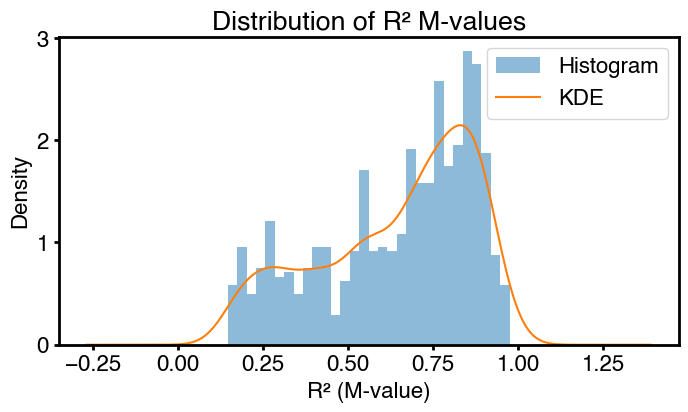

In [122]:
corsiv_mqtl_df = pd.read_csv("../humanData/corsiv_probe_mqtl_r2.csv")
plt.figure(figsize=(8,4))
plt.hist(corsiv_mqtl_df['R2_mvalue'], bins=30, alpha=0.5, density=True, label='Histogram')
corsiv_mqtl_df['R2_mvalue'].plot(kind='kde', label='KDE')
plt.xlabel('R² (M-value)')
plt.ylabel('Density')
plt.title('Distribution of R² M-values')
plt.legend()
plt.show()

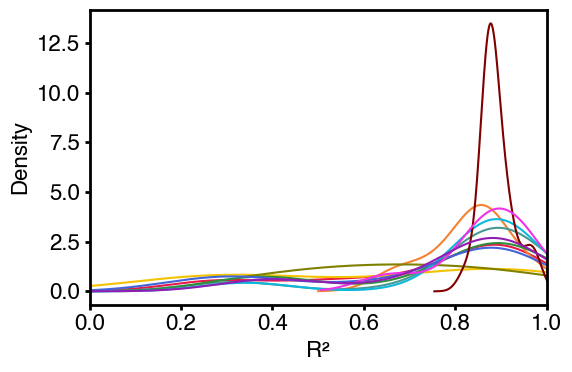

In [123]:
plt.figure(figsize=(6, 4))
for i, c in enumerate(CATEGORY_NAMES):
    df = pd.read_csv(f"probe/{c}_all_probes.csv") if c != "metabolic" else pd.read_csv(f"probe/metabolic_diseases_all_probes.csv")
    df = df[df["probeId"].isin(CORSIV_PROBE_LIST)]

    probes = Counter(df["probeId"])
    probes = [p for p, ct in probes.items() if ct > 1]
    curr_df = corsiv_mqtl_df[corsiv_mqtl_df["Probe_ID"].isin(probes)]
    
    curr_df['R2_mvalue'].plot(kind='kde', color=COLOR_TEMPLATE[i], label=c.capitalize())

plt.xlabel('R²')
plt.ylabel('Density') 
plt.xlim(0, 1)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

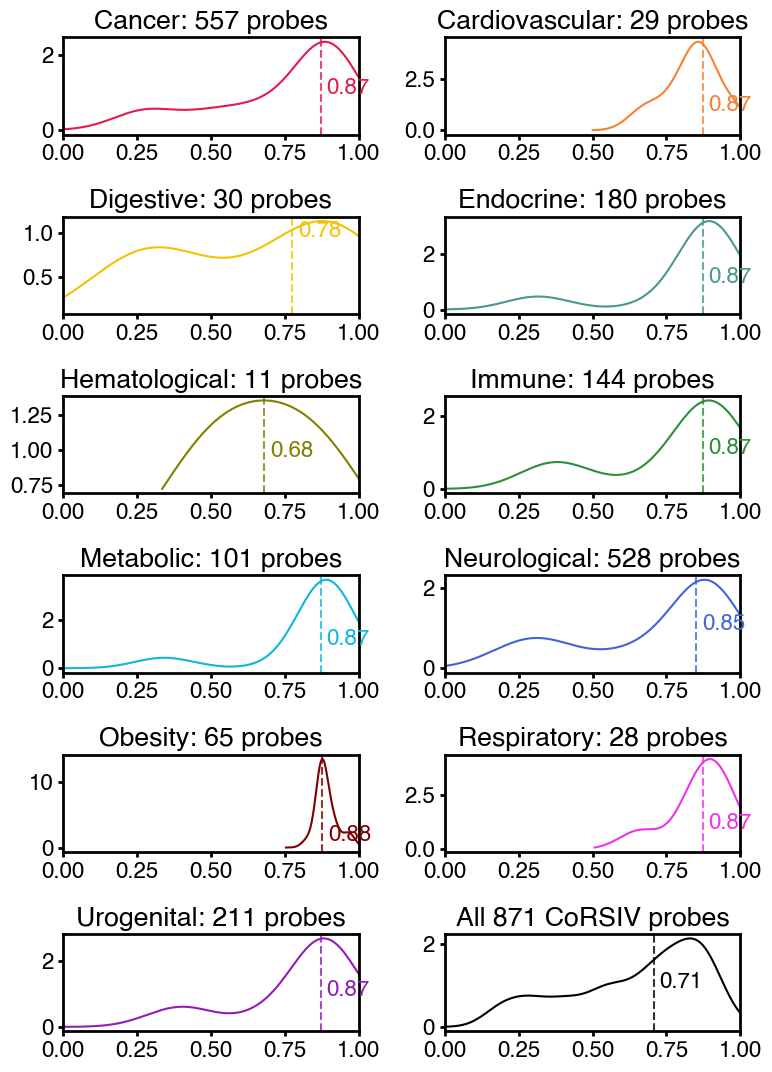

In [148]:
graph_type = "kde"
fig, axes = plt.subplots(len(CATEGORY_NAMES)//2+1, 2, figsize=(8, 2*len(CATEGORY_NAMES)//2))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier
for i, c in enumerate(CATEGORY_NAMES):
    # Create one tall figure with subplots stacked vertically
    
    df = pd.read_csv(f"probe/{c}_all_probes.csv") if c != "metabolic" else pd.read_csv(f"probe/metabolic_diseases_all_probes.csv")
    df = df[df["probeId"].isin(CORSIV_PROBE_LIST)]
    probes = Counter(df["probeId"])
    probes = [p for p, ct in probes.items() if ct > 1]
    if len(probes) == 0:
        continue
    curr_df = corsiv_mqtl_df[corsiv_mqtl_df["Probe_ID"].isin(probes)]
    
    # Plot on the appropriate subplot
    if graph_type == "histogram":
        curr_df['R2_mvalue'].hist(color=COLOR_TEMPLATE[i], ax=axes[i])
        axes[i].grid(False)
    else:   
        curr_df['R2_mvalue'].plot(kind='kde', color=COLOR_TEMPLATE[i], ax=axes[i])
        median = curr_df['R2_mvalue'].median()
        axes[i].axvline(median, color=COLOR_TEMPLATE[i], linestyle='--', alpha=0.8)
        axes[i].text(median+0.02, 0.95, f'{median:.2f}', rotation=0, color=COLOR_TEMPLATE[i])

    axes[i].set_xlabel('')#Estimated R²
    axes[i].set_ylabel('') #Density
    axes[i].set_xlim(0, 1)
    axes[i].set_title(f"{c.capitalize()}: {len(probes):,} probes")
curr_df = corsiv_mqtl_df[corsiv_mqtl_df["Probe_ID"].isin(CORSIV_PROBE_LIST)]
if graph_type == "histogram":   
    curr_df['R2_mvalue'].hist(color="black", ax=axes[-1])
    axes[-1].grid(False)
else:
    curr_df['R2_mvalue'].plot(kind='kde', color="black", ax=axes[-1])
    median = curr_df['R2_mvalue'].median()
    axes[-1].axvline(median, color="black", linestyle='--', alpha=0.8)
    axes[-1].text(median+0.02, 0.95, f'{median:.2f}', rotation=0)

axes[-1].set_xlabel('')#Estimated R²
axes[-1].set_ylabel('') #Density
axes[-1].set_xlim(0, 1)
axes[-1].set_title(f"All {len(curr_df):,} CoRSIV probes")

# Adjust spacing between subplots
plt.tight_layout()
# plt.show()
SFIG_PATH = "/Users/antata/Library/CloudStorage/OneDrive-BaylorCollegeofMedicine/text-mining/manuscript/sfigs"
plt.savefig(f"{SFIG_PATH}/corsiv_probe_mqtl_r2.svg")
